# Submission 1. Simple Regression

| Variable | Definition                      | Key                                         |
|----------|---------------------------------|---------------------------------------------|
| survival | Survival                        | 0 = No, 1 = Yes                             |
| pclass   | Ticket class                    | 1 = 1st, 2 = 2nd, 3 = 3rd                   |
| sex      | Sex                             |                                             |
| Age      | Age in years                    |                                             |
| sibsp    | # of siblings / spouses aboard the Titanic |                               |
| parch    | # of parents / children aboard the Titanic  |                               |
| ticket   | Ticket number                   |                                             |
| fare     | Passenger fare                  |                                             |
| cabin    | Cabin number                    |                                             |
| embarked | Port of Embarkation             | C = Cherbourg, Q = Queenstown, S = Southampton |

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Read train and test files into pandas dataframes
df_train_original = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Exploratory Data Analysis

In [3]:
df_train_original.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train_original['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [5]:
# input_features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
categorical_features = ['Sex', 'Pclass','SibSp','Parch']
numerical_features = ['Age', 'Fare']
# input_features = list(df_train_original.columns)
# input_features.remove(['Name','Ticket','PassengerId','Cabin','Survived','Fare',])

# Preprocessing

In [6]:
df_train = df_train_original[categorical_features + numerical_features].copy()

### Filling Missing values

In [7]:
# Check for missing values
df_train.isnull().sum()

Sex         0
Pclass      0
SibSp       0
Parch       0
Age       177
Fare        0
dtype: int64

In [8]:
df_train.loc[:,'Age']=df_train['Age'].fillna(df_train['Age'].median())

In [9]:
df_train.isnull().sum()

Sex       0
Pclass    0
SibSp     0
Parch     0
Age       0
Fare      0
dtype: int64

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     891 non-null    object 
 1   Pclass  891 non-null    int64  
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Age     891 non-null    float64
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [11]:
df_train.head()

,Sex,Pclass,SibSp,Parch,Age,Fare
0,male,3,1,0,22.0,7.2500
1,female,1,1,0,38.0,71.2833
2,female,3,0,0,26.0,7.9250
3,female,1,1,0,35.0,53.1000
4,male,3,0,0,35.0,8.0500


### Preprocessing Categorical Variables

In [12]:
## One-Hot Encoding to categorical variables
# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(drop='first')

#encoded
encoded = encoder.fit_transform(df_train[categorical_features])

# Fit and transform the categorical columns using the encoder
df_train_encoded = pd.DataFrame(encoded.toarray())

# Assign column names to the encoded DataFrame
df_train_encoded.columns = encoder.get_feature_names_out(categorical_features)

# Concatenate the encoded DataFrame with the original DataFrame
df_train = pd.concat([df_train, df_train_encoded], axis=1)

# Drop the original categorical columns
df_train.drop(categorical_features, axis=1, inplace=True)

df_train

,Age,Fare,Sex_male,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,22.0,7.2500,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,38.0,71.2833,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26.0,7.9250,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35.0,53.1000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,35.0,8.0500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
887,19.0,30.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,28.0,23.4500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
889,26.0,30.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Preprocessing of Numerical features

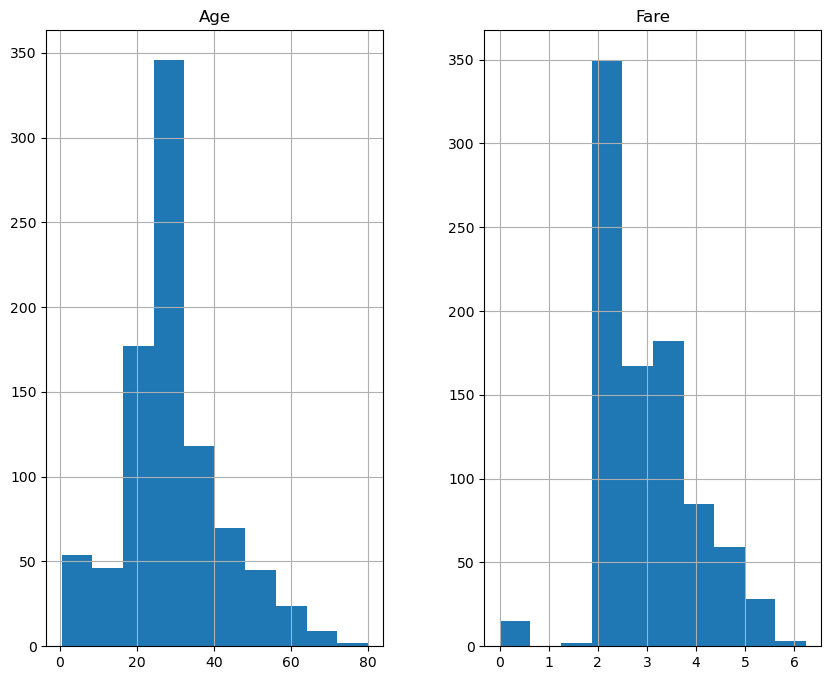

In [15]:
# Check their formats
df_train[numerical_features].hist(figsize=(10, 8))
plt.show()

Applying log transformation to Fare, Parch and SibSp to reduce skewness

In [16]:
df_train['Fare'] = np.log1p(df_train['Fare'])
# df_train['Parch'] = np.log1p(df_train['Age'])

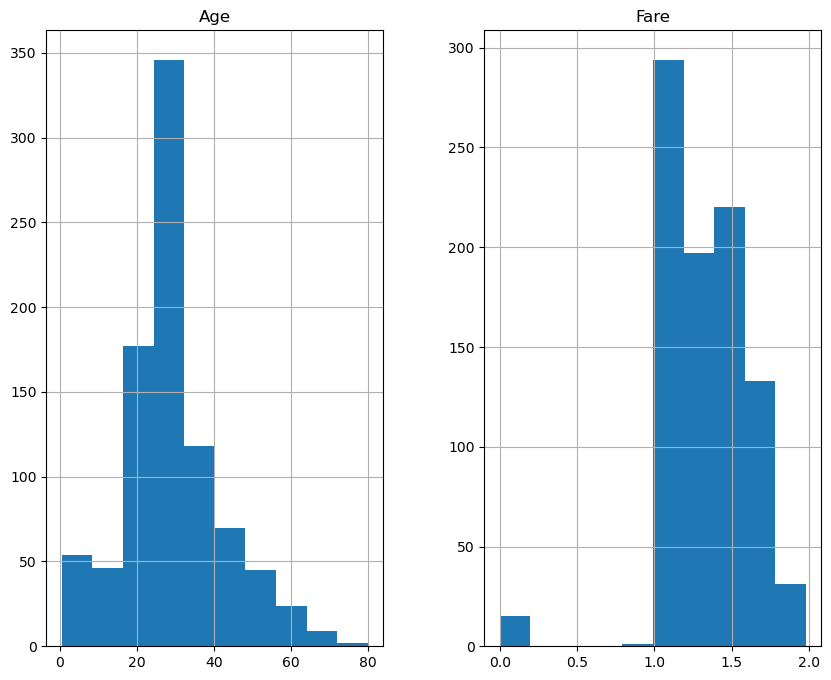

In [17]:
# Check their formats
df_train[numerical_features].hist(figsize=(10, 8))
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Apply standard scaling to the numerical features
df_train[numerical_features] = scaler.fit_transform(df_train[numerical_features])


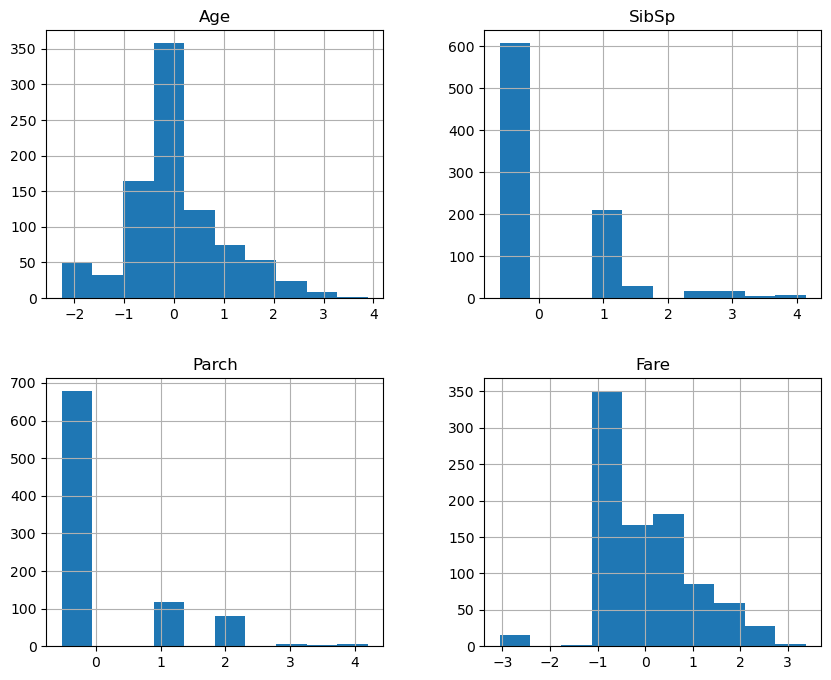

In [ ]:
# Check their formats
df_train[numerical_features].hist(figsize=(10, 8))
plt.show()